In [79]:
import imageio.v2 as imageio
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
import cv2
from collections import Counter
import os

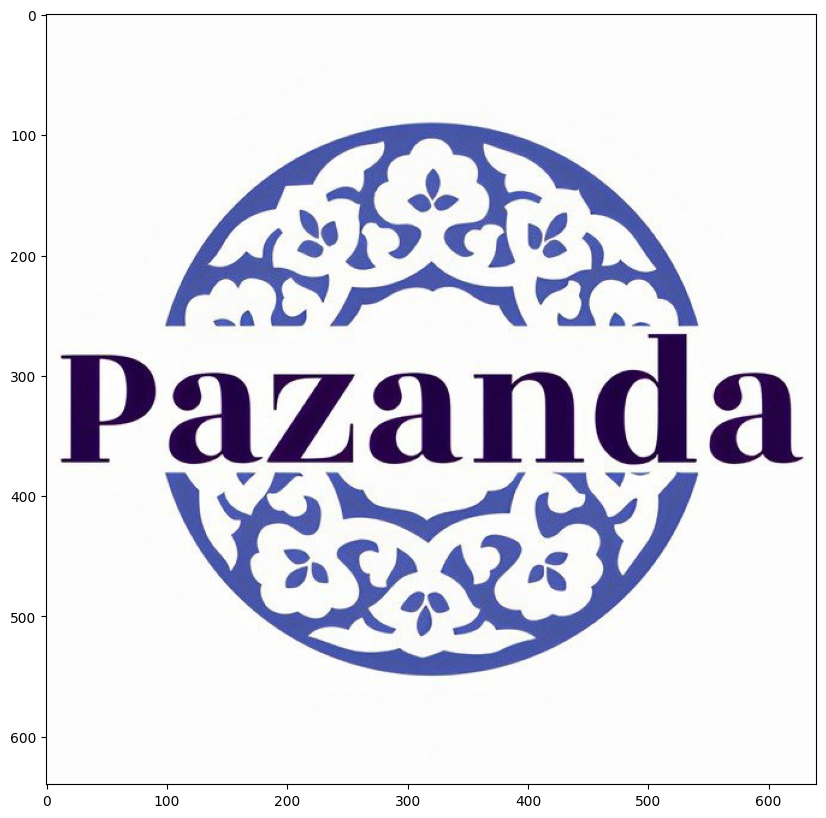

In [80]:
pic = imageio.imread('images/image3.jpg')
plt.figure(figsize=(10, 10))
plt.imshow(pic)
plt.show()

In [81]:
print('Type of the image:', type(pic))
print('Shape of the image:', pic.shape)
print('Height of the image:', pic.shape[0])
print('Width of the image:', pic.shape[1])
print('Dimension of the Image:', pic.ndim)

Type of the image: <class 'numpy.ndarray'>
Shape of the image: (640, 640, 3)
Height of the image: 640
Width of the image: 640
Dimension of the Image: 3


In [82]:
print('Image size:', pic.size)
print('Maximum RGB value in this image:', pic.max())
print('Minimum RGB value in this image:', pic.min())

Image size: 1228800
Maximum RGB value in this image: 255
Minimum RGB value in this image: 0


In [83]:
# RGB values at a specific pixel
print('Value of only R channel:', pic[150, 100, 0])
print('Value of only G channel:', pic[150, 100, 1])
print('Value of only B channel:', pic[150, 100, 2])

Value of only R channel: 252
Value of only G channel: 252
Value of only B channel: 252


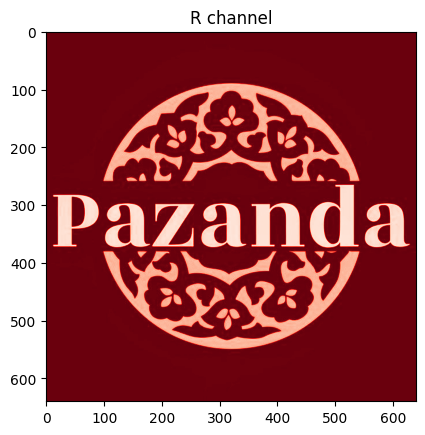

In [84]:
plt.title('R channel')
plt.imshow(pic[:, :, 0], cmap='Reds')
plt.show()

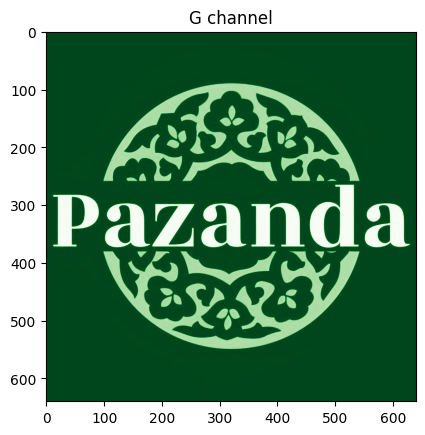

In [85]:
plt.title('G channel')
plt.imshow(pic[:, :, 1], cmap='Greens')
plt.show()

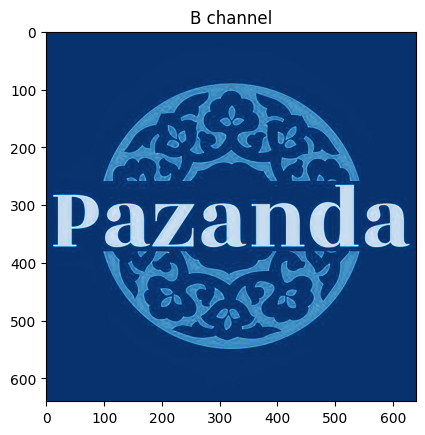

In [86]:
plt.title('B channel')
plt.imshow(pic[:, :, 2], cmap='Blues')
plt.show()

In [87]:
def checkDetailsImage(image):
    print("The type of image is", type(image))
    print("Shape of the image:", image.shape)

checkDetailsImage(pic)

The type of image is <class 'numpy.ndarray'>
Shape of the image: (640, 640, 3)


In [88]:
def RGB_HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))


In [89]:
def get_colors(image, number_of_colors, show_chart):
    if image.shape[2] == 4:
        image = cv2.cvtColor(image, cv2.COLOR_RGBA2RGB)
    elif image.shape[2] == 1:
        image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)

    reshaped_image = cv2.resize(image, (600, 400))
    reshaped_image = reshaped_image.reshape(reshaped_image.shape[0]*reshaped_image.shape[1], 3)
    clf = KMeans(n_clusters=number_of_colors)
    labels = clf.fit_predict(reshaped_image)
    counts = Counter(labels)
    center_colors = clf.cluster_centers_
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB_HEX(ordered_colors[i]) for i in counts.keys()]

    if show_chart:
        plt.figure(figsize=(8, 6))
        plt.pie(counts.values(), labels=hex_colors, colors=hex_colors)
        plt.show()

    return hex_colors

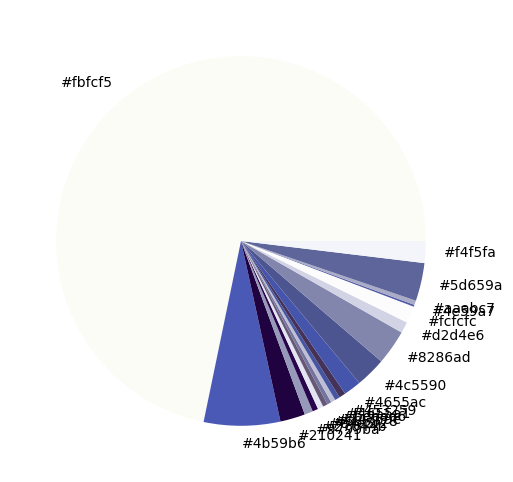

Dominant colors as hex: ['#fbfcf5', '#4b59b6', '#210241', '#9799ba', '#27044b', '#e4e5f2', '#685878', '#74759e', '#bebed6', '#4655a1', '#453259', '#4655ac', '#4c5590', '#8286ad', '#d2d4e6', '#fcfcfc', '#4e59a7', '#aaabc7', '#5d659a', '#f4f5fa']


In [92]:
dominant_colors = get_colors(pic, number_of_colors=10, show_chart=True)
print("Dominant colors as hex:", dominant_colors)